#Comparaciones de rentabilidades en instrumentos financieros reales.

Luis Lapo, Cristian Ojeda.

###Objetivos

Evaluar la sostenibilidad de una cartera de inversión inicial de USD 100000 gestionada bajo
 diferentes estrategias de asignación de activos y rebalanceo (por ejemplo: 60% renta variable
 / 40% renta fija + reglas de rebalanceo), con el fin de determinar la capacidad del fondo para
 sostener los pagos mensuales de USD 1200 que recibe un jubilado durante un horizonte de
 largo plazo, maximizando la rentabilidad y minimizando el riesgo de agotamiento del capital.

 • Analizar la evolución del capital del fondo ante distintos escenarios de mercado, tasas
 de retorno e inflación, determinando el tiempo esperado de sostenibilidad.

 • Identificar la combinación óptima de activos y parámetros de gestión que permitan
 garantizar un flujo de ingresos estable al beneficiario, preservando el valor real del
 capital en el tiempo.


## Análisis del Modelo de Simulación de Cartera

Este notebook presenta un modelo de simulación para evaluar la sostenibilidad de una cartera de inversión con retiros mensuales, considerando diferentes escenarios de inflación y estrategias de rebalanceo. Los resultados de las simulaciones base se resumen en la tabla `resumen_df`, mientras que la simulación Monte Carlo extendida se presenta en la tabla `resultados_mc`.

### Activos de la Cartera

La cartera de inversión simulada actualmente está compuesta por los siguientes activos, definidos en el código usando sus tickers de Yahoo Finance:

*   **Acción 1 (AAPL):** Apple Inc. - Una acción de tecnología de gran capitalización.
*   **Acción 2 (MSFT):** Microsoft Corporation - Otra acción líder en el sector tecnológico.
*   **Bonos (IEF):** iShares 7-10 Year Treasury Bond ETF - Un fondo cotizado que invierte en bonos del Tesoro de EE. UU. con vencimientos entre 7 y 10 años, representando la parte de renta fija de la cartera.

La asignación inicial de la cartera se define por los `pesos_iniciales`, que actualmente están configurados como 40% AAPL, 20% MSFT y 40% IEF, siguiendo una estrategia de 60% renta variable / 40% renta fija.

### Estrategias de Rebalanceo

El rebalanceo es el proceso de ajustar la cartera periódicamente para mantener la asignación de activos deseada. El código simula dos estrategias principales:

1.  **Rebalanceo por Tiempo (`estrategia="tiempo"`):** La cartera se rebalancea a la asignación inicial (`pesos_iniciales`) en intervalos de tiempo fijos. En este caso, el rebalanceo se realiza cada `frecuencia_rebalanceo` meses (configurado actualmente a 3 meses, es decir, trimestralmente).

2.  **Rebalanceo por Umbral (`estrategia="umbral"`):** La cartera se rebalancea a la asignación inicial solo cuando el peso de algún activo se desvía de su peso objetivo inicial por más de un `umbral_rebalanceo` (configurado actualmente al 5%). Esto significa que el rebalanceo ocurre de forma dinámica en función de los movimientos del mercado.

Ambas estrategias incurren un pequeño `coste_transaccion` cada vez que se realiza un rebalanceo para simular los costos asociados a la compra y venta de activos.

### Funcionamiento del Código

El código se estructura en varias partes clave:

1.  **Parámetros Generales:** Define las variables de configuración inicial como el capital inicial, el retiro mensual, los activos, los pesos, la frecuencia y umbral de rebalanceo, los costos de transacción y los escenarios de inflación a simular.
2.  **Descarga de Datos:** Utiliza la librería `yfinance` para descargar los precios históricos ajustados (o de cierre si no están disponibles) de los activos seleccionados. Calcula los retornos mensuales a partir de estos precios.
3.  **Función de Simulación (`simular_fondo`):** Esta función simula la evolución del capital del fondo mes a mes. Toma como entradas los pesos iniciales, una tasa de inflación anual, la estrategia de rebalanceo, la frecuencia (para rebalanceo por tiempo) y el umbral (para rebalanceo por umbral). En cada paso mensual, aplica los retornos del mercado, realiza el retiro correspondiente (ajustado por inflación) y aplica la lógica de rebalanceo si se cumplen las condiciones. Registra el capital, el retiro, el retorno, la inflación y la estrategia en un historial.
4.  **Ejecución de Simulaciones Base:** Llama a la función `simular_fondo` para cada combinación de escenario de inflación y estrategia de rebalanceo definida, almacenando los resultados.
5.  **Análisis de Resultados Base:** Procesa los resultados de las simulaciones base para generar la tabla resumen (`resumen_df`), mostrando el tiempo que duró el fondo (hasta el final del período histórico simulado) y el capital final para cada escenario.
6.  **Gráficos Comparativos Base:** Genera gráficos para visualizar la evolución del capital y de los retiros mensuales a lo largo del tiempo para cada escenario base.
7.  **Simulación Monte Carlo (`simular_montecarlo` y Escaneo):** Esta sección realiza una simulación más avanzada utilizando el método de Monte Carlo. La función `simular_montecarlo` toma retornos históricos y los muestrea aleatoriamente con reemplazo para crear `num_simulaciones` escenarios de rendimiento futuros posibles, cada uno con una duración de `horizonte_meses`. Para cada simulación, simula la evolución del fondo mes a mes, aplicando retornos muestreados, realizando el retiro mensual ajustado por inflación, y aplicando la estrategia de rebalanceo por tiempo. Registra si el fondo se agota antes del `horizonte_meses` y la duración que alcanzó.
8.  **Análisis y Reporte de Resultados Monte Carlo:** Los resultados de las `num_simulaciones` para cada combinación de capital inicial e inflación se recopilan en la tabla `resultados_mc`. A partir de estos datos, se calculan y reportan dos métricas clave:
    *   **Probabilidad de Sostenibilidad (≥25 años):** Esta es la proporción de simulaciones en las que el fondo no se agotó antes de alcanzar el `horizonte_anios` (25 años). Se calcula como:

$$
P(\text{sostenibilidad}) =
\frac{\text{Número de simulaciones donde } Capital_{final} > 0}
     {\text{Número total de simulaciones}}
$$

Donde el "Capital final" se evalúa al final del `horizonte_anios`.

*   **Duración Esperada (años):** Es el promedio de la duración que alcanzó el fondo a través de todas las simulaciones. Si una simulación no se agotó, su duración se considera igual al `horizonte_anios`. Se calcula como:

$$
E(\text{Duración}) = \frac{1}{\text{Número total de simulaciones}} \sum_{i=1}^{\text{Número total de simulaciones}} \text{Duración de la simulación } i
$$

        
     
 La duración de cada simulación $i$ es el número de meses hasta el agotamiento o el `horizonte_meses`, convertido a años.

  El código luego genera gráficos que visualizan la $P(\text{sostenibilidad})$ y $E(\text{Duración})$ frente al Capital inicial para cada escenario de inflación simulado.

  Finalmente, el código identifica, para el escenario de inflación del 3%, el `Capital inicial` dentro del rango `capitales` probado que resultó en la mayor `Probabilidad de sostenibilidad (≥25 años)` según los datos de `resultados_mc`. Este capital se reporta junto con su probabilidad de sostenibilidad y duración esperada asociadas. Es importante notar que esto no es una optimización matemática rigurosa para encontrar el capital mínimo necesario, sino la identificación del mejor desempeño observado dentro del conjunto discreto de capitales iniciales simulados.

En conjunto, el código permite simular y analizar el rendimiento de una cartera de inversión bajo retiros constantes ajustados por inflación, proporcionando información valiosa sobre la sostenibilidad del fondo y el impacto de diferentes parámetros. La simulación Monte Carlo ofrece una perspectiva probabilística sobre la viabilidad a largo plazo.

/tmp/ipython-input-54075747.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(activos.values()), start=start_date, end=end_date, progress=False)
/tmp/ipython-input-54075747.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample("M").last()


,Inflación anual,Estrategia,Años sostenidos,Capital final ($)
0,0%,tiempo,9.916667,238772.770038
1,0%,umbral,9.916667,271140.132209
2,3%,tiempo,9.916667,192980.199194
3,3%,umbral,9.916667,223640.744537
4,5%,tiempo,9.916667,158973.256918
5,5%,umbral,9.916667,188411.865271


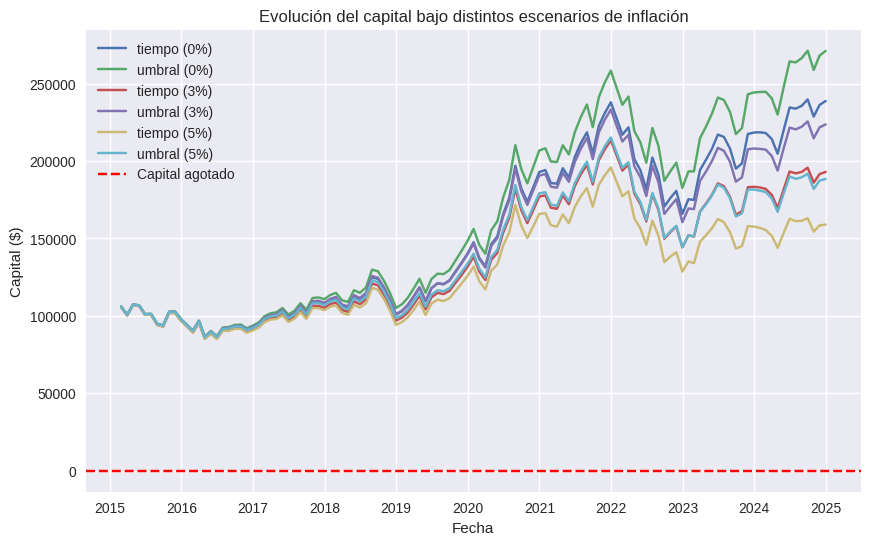

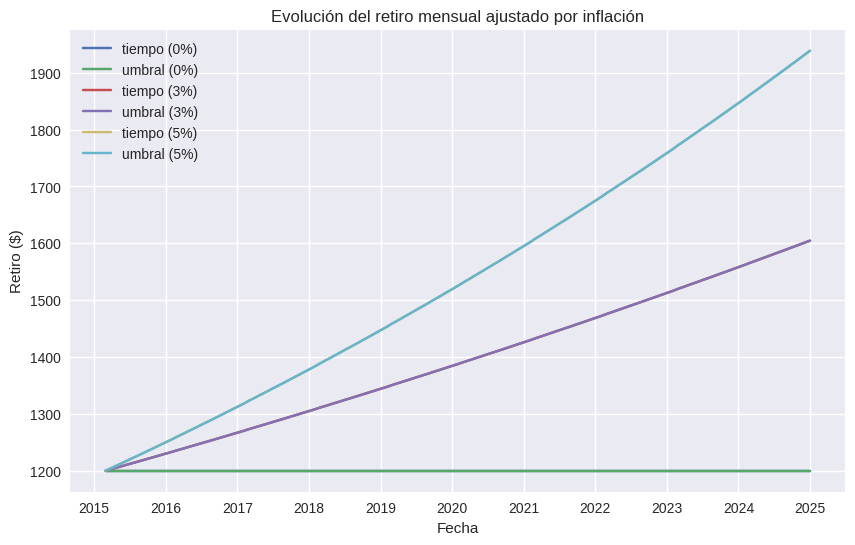


📘 Escenario: Inflación 0% - Estrategia tiempo


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,105849.428520,1200.0,0.072616,0.0,tiempo
1,2015-03-31,100422.230271,1200.0,-0.039936,0.0,tiempo
2,2015-04-30,107211.147695,1200.0,0.079553,0.0,tiempo
3,2015-05-31,106352.223025,1200.0,0.005169,0.0,tiempo
4,2015-06-30,100761.441645,1200.0,-0.041285,0.0,tiempo
5,2015-07-31,100868.219880,1200.0,0.012969,0.0,tiempo
6,2015-08-31,94324.812082,1200.0,-0.051100,0.0,tiempo
7,2015-09-30,93241.157342,1200.0,0.001233,0.0,tiempo
8,2015-10-31,102094.794297,1200.0,0.107824,0.0,tiempo
9,2015-11-30,101976.876528,1200.0,0.012600,0.0,tiempo



📘 Escenario: Inflación 0% - Estrategia umbral


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,106061.551623,1200.0,0.072616,0.0,umbral
1,2015-03-31,100625.882035,1200.0,-0.039936,0.0,umbral
2,2015-04-30,107431.000624,1200.0,0.079553,0.0,umbral
3,2015-05-31,106786.343146,1200.0,0.005169,0.0,umbral
4,2015-06-30,101177.638996,1200.0,-0.041285,0.0,umbral
5,2015-07-31,101289.814906,1200.0,0.012969,0.0,umbral
6,2015-08-31,94913.891223,1200.0,-0.051100,0.0,umbral
7,2015-09-30,93830.963084,1200.0,0.001233,0.0,umbral
8,2015-10-31,102748.195269,1200.0,0.107824,0.0,umbral
9,2015-11-30,102842.873153,1200.0,0.012600,0.0,umbral



📘 Escenario: Inflación 3% - Estrategia tiempo


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,105849.428520,1200.000000,0.072616,0.03,tiempo
1,2015-03-31,100419.270747,1202.959524,-0.039936,0.03,tiempo
2,2015-04-30,107202.026385,1205.926346,0.079553,0.03,tiempo
3,2015-05-31,106334.190216,1208.900486,0.005169,0.03,tiempo
4,2015-06-30,100732.271365,1211.881961,-0.041285,0.03,tiempo
5,2015-07-31,100823.800501,1214.870789,0.012969,0.03,tiempo
6,2015-08-31,94264.915584,1217.866988,-0.051100,0.03,tiempo
7,2015-09-30,93160.316388,1220.870576,0.001233,0.03,tiempo
8,2015-10-31,101981.355174,1223.881573,0.107824,0.03,tiempo
9,2015-11-30,101835.391559,1226.899995,0.012600,0.03,tiempo



📘 Escenario: Inflación 3% - Estrategia umbral


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,106061.551623,1200.000000,0.072616,0.03,umbral
1,2015-03-31,100622.922511,1202.959524,-0.039936,0.03,umbral
2,2015-04-30,107421.879314,1205.926346,0.079553,0.03,umbral
3,2015-05-31,106768.274199,1208.900486,0.005169,0.03,umbral
4,2015-06-30,101148.434069,1211.881961,-0.041285,0.03,umbral
5,2015-07-31,101245.360432,1214.870789,0.012969,0.03,umbral
6,2015-08-31,94853.841391,1217.866988,-0.051100,0.03,umbral
7,2015-09-30,93749.968607,1220.870576,0.001233,0.03,umbral
8,2015-10-31,102634.586069,1223.881573,0.107824,0.03,umbral
9,2015-11-30,102700.932426,1226.899995,0.012600,0.03,umbral



📘 Escenario: Inflación 5% - Estrategia tiempo


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,105849.428520,1200.000000,0.072616,0.05,tiempo
1,2015-03-31,100417.341322,1204.888949,-0.039936,0.05,tiempo
2,2015-04-30,107196.071999,1209.797815,0.079553,0.05,tiempo
3,2015-05-31,106322.402478,1214.726681,0.005169,0.05,tiempo
4,2015-06-30,100713.176620,1219.675628,-0.041285,0.05,tiempo
5,2015-07-31,100794.684166,1224.644738,0.012969,0.05,tiempo
6,2015-08-31,94225.598786,1229.634092,-0.051100,0.05,tiempo
7,2015-09-30,93107.177897,1234.643773,0.001233,0.05,tiempo
8,2015-10-31,101906.694784,1239.673865,0.107824,0.05,tiempo
9,2015-11-30,101742.152808,1244.724450,0.012600,0.05,tiempo



📘 Escenario: Inflación 5% - Estrategia umbral


,Fecha,Capital,Retiro,Retorno,Inflación,Estrategia
0,2015-02-28,106061.551623,1200.000000,0.072616,0.05,umbral
1,2015-03-31,100620.993087,1204.888949,-0.039936,0.05,umbral
2,2015-04-30,107415.924928,1209.797815,0.079553,0.05,umbral
3,2015-05-31,106756.462838,1214.726681,0.005169,0.05,umbral
4,2015-06-30,101129.316677,1219.675628,-0.041285,0.05,umbral
5,2015-07-31,101216.221156,1224.644738,0.012969,0.05,umbral
6,2015-08-31,94814.424032,1229.634092,-0.051100,0.05,umbral
7,2015-09-30,93696.729432,1234.643773,0.001233,0.05,umbral
8,2015-10-31,102559.814139,1239.673865,0.107824,0.05,umbral
9,2015-11-30,102607.393878,1244.724450,0.012600,0.05,umbral


In [2]:
# ======================================================================================
#  Simulación actuarial con análisis de sensibilidad a la inflación
# ======================================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("seaborn-v0_8")

# -------------------------------------------------------------------------------------
#  Parámetros generales
# -------------------------------------------------------------------------------------

start_date = "2015-01-01"
end_date = "2025-01-01"

capital_inicial = 100000
retiro_mensual_inicial = 1200

# Estrategias de rebalanceo
frecuencia_rebalanceo = 3   # meses (trimestral)
umbral_rebalanceo = 0.05    # 5%
coste_transaccion = 0.002   # 0.2% por rebalanceo

# Activos elegidos (puedes cambiarlos libremente)
activos = {
    "Acción 1": "AAPL",
    "Acción 2": "MSFT",
    "Bonos": "IEF"
}

# Pesos iniciales (60% renta variable / 40% renta fija)
pesos_iniciales = np.array([0.4, 0.2, 0.4])

# Escenarios de inflación anual (0%, 3%, 5%)
inflaciones = [0.00, 0.03, 0.05]

# -------------------------------------------------------------------------------------
# Descargar precios históricos y calcular retornos mensuales
# -------------------------------------------------------------------------------------

data = yf.download(list(activos.values()), start=start_date, end=end_date, progress=False)


if isinstance(data.columns, pd.MultiIndex):
    if 'Adj Close' in data.columns.levels[0]:
        data = data['Adj Close']
    elif 'Close' in data.columns.levels[0]:
        data = data['Close']
    else:
        raise KeyError("Could not find 'Adj Close' or 'Close' column in downloaded data.")
else:
    if 'Adj Close' in data.columns:
        data = data['Adj Close']
    elif 'Close' in data.columns:
        data = data['Close']
    else:
        raise KeyError("Could not find 'Adj Close' or 'Close' column in downloaded data.")

data.columns = activos.keys()
data = data.resample("M").last()
retornos = data.pct_change().dropna()

# -------------------------------------------------------------------------------------
#  Función de simulación del fondo
# -------------------------------------------------------------------------------------

def simular_fondo(pesos_iniciales, inflacion_anual=0.02, estrategia="tiempo",
                  frecuencia=3, umbral=0.05):
    """
    Simula la evolución del fondo con inflación fija anual y estrategia de rebalanceo.
    """
    capital = capital_inicial
    retiro_mensual = retiro_mensual_inicial
    pesos = pesos_iniciales.copy()
    historial = []
    inflacion_mensual = (1 + inflacion_anual)**(1/12) - 1

    for i, fecha in enumerate(retornos.index):
        # Ajuste del retiro mensual por inflación constante
        if i > 0:
            retiro_mensual *= (1 + inflacion_mensual)

        # Calcular retorno ponderado de la cartera
        r = np.dot(retornos.loc[fecha].values, pesos)
        capital *= (1 + r)
        capital -= retiro_mensual

        # Estrategia de rebalanceo
        if estrategia == "tiempo" and (i % frecuencia == 0):
            pesos = pesos_iniciales.copy()
            capital -= capital * coste_transaccion
        elif estrategia == "umbral":
            desv = np.abs((pesos - pesos_iniciales)/pesos_iniciales)
            if any(desv > umbral):
                pesos = pesos_iniciales.copy()
                capital -= capital * coste_transaccion

        # Guardar resultados
        historial.append({
            "Fecha": fecha,
            "Capital": capital,
            "Retiro": retiro_mensual,
            "Retorno": r,
            "Inflación": inflacion_anual,
            "Estrategia": estrategia
        })

        # Si el fondo se agota, se detiene
        if capital <= 0:
            break

    return pd.DataFrame(historial)

# -------------------------------------------------------------------------------------
# Ejecutar simulaciones para todos los escenarios
# -------------------------------------------------------------------------------------

resultados = {}

for inflacion in inflaciones:
    df_tiempo = simular_fondo(pesos_iniciales, inflacion_anual=inflacion, estrategia="tiempo")
    df_umbral = simular_fondo(pesos_iniciales, inflacion_anual=inflacion, estrategia="umbral")
    resultados[(inflacion, "tiempo")] = df_tiempo
    resultados[(inflacion, "umbral")] = df_umbral

# -------------------------------------------------------------------------------------
#  Análisis de resultados
# -------------------------------------------------------------------------------------

resumen = []

for (inflacion, estrategia), df in resultados.items():
    anios = len(df)/12
    cap_final = df["Capital"].iloc[-1]
    resumen.append({
        "Inflación anual": f"{inflacion*100:.0f}%",
        "Estrategia": estrategia,
        "Años sostenidos": anios,
        "Capital final ($)": cap_final
    })

resumen_df = pd.DataFrame(resumen)
display(resumen_df)

# -------------------------------------------------------------------------------------
#  Gráficos comparativos
# -------------------------------------------------------------------------------------

# --- Evolución del capital ---
plt.figure(figsize=(10,6))
for (inflacion, estrategia), df in resultados.items():
    plt.plot(df["Fecha"], df["Capital"], label=f"{estrategia} ({inflacion*100:.0f}%)")
plt.axhline(y=0, color="red", linestyle="--", label="Capital agotado")
plt.title("Evolución del capital bajo distintos escenarios de inflación")
plt.xlabel("Fecha")
plt.ylabel("Capital ($)")
plt.legend()
plt.grid(True)
plt.show()

# --- Evolución del retiro mensual (ajustado por inflación) ---
plt.figure(figsize=(10,6))
for (inflacion, estrategia), df in resultados.items():
    plt.plot(df["Fecha"], df["Retiro"], label=f"{estrategia} ({inflacion*100:.0f}%)")
plt.title("Evolución del retiro mensual ajustado por inflación")
plt.xlabel("Fecha")
plt.ylabel("Retiro ($)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------------------
# Tablas de evolución (primeros meses)
# -------------------------------------------------------------------------------------

for (inflacion, estrategia), df in resultados.items():
    print(f"\n Escenario: Inflación {inflacion*100:.0f}% - Estrategia {estrategia}")
    display(df.head(12))

# -------------------------------------------------------------------------------------
#  Conclusión
# -------------------------------------------------------------------------------------
# Este análisis muestra:
# - Cómo la inflación afecta la duración del fondo y su capital final.
# - Que el rebalanceo trimestral y por umbral tienden a comportarse distinto bajo inflación alta.
# - Que a mayor inflación, se reduce la sostenibilidad promedio (en años) del fondo.

## Conclusiones basadas en la tabla de resumen (`resumen_df`)

La tabla `resumen_df` muestra un resumen de la evolución del capital de la cartera bajo diferentes escenarios de inflación (0%, 3% y 5% anual) y dos estrategias de rebalanceo (por tiempo y por umbral) a lo largo del período histórico de los datos (aproximadamente 10 años, de 2015 a 2025).

Las principales conclusiones de esta tabla son:

*   **Todos los escenarios sobrevivieron el período histórico:** En todas las combinaciones de inflación y estrategia de rebalanceo simuladas, el fondo no se agotó antes del final del período de datos históricos. La columna "Años sostenidos" muestra consistentemente el mismo valor (aproximadamente 9.92 años), que corresponde a la duración de los datos históricos utilizados para la simulación.

*   **La inflación reduce significativamente el capital final:** Aunque el fondo no se agotó en ninguno de los escenarios históricos, la inflación tuvo un impacto sustancial en la cantidad de capital restante al final del período. A medida que aumenta la tasa de inflación anual, el capital final disminuye notablemente. Esto se debe a que los retiros mensuales se ajustan por inflación, lo que significa que la cantidad real retirada del fondo aumenta con el tiempo en escenarios de alta inflación.

*   **La estrategia de rebalanceo por umbral tiende a dejar más capital final:** Comparando las dos estrategias de rebalanceo dentro de cada escenario de inflación, la estrategia por "umbral" (rebalanceo cuando la desviación de pesos supera un 5%) resultó en un capital final consistentemente mayor que la estrategia basada en "tiempo" (rebalanceo trimestral). Esto sugiere que, para esta cartera y período histórico, permitir que los activos se desvíen ligeramente antes de rebalancear fue más beneficioso que rebalancear en intervalos fijos.

En resumen, si bien la cartera actual parece robusta frente a retiros fijos ajustados por inflación durante un período de 10 años basado en datos históricos recientes, la inflación es un factor crítico que erosiona el capital. La estrategia de rebalanceo por umbral demostró ser más efectiva en la preservación del capital en este contexto histórico. Para evaluar la sostenibilidad a más largo plazo, es fundamental recurrir a métodos como la simulación Monte Carlo, que ya se ha explorado en la sección `resultados_mc`.

,Inflación anual,Capital inicial,Probabilidad de sostenibilidad (≥25 años),Duración esperada (años)
0,0%,50000,0.0615,7.452708
1,0%,60000,0.2070,11.940708
2,0%,70000,0.4050,16.258625
3,0%,80000,0.5735,19.141542
4,0%,90000,0.7250,21.493667
5,0%,100000,0.8340,23.037167
6,0%,110000,0.8915,23.793417
7,0%,120000,0.9385,24.334125
8,0%,130000,0.9665,24.672708
9,0%,140000,0.9750,24.788083


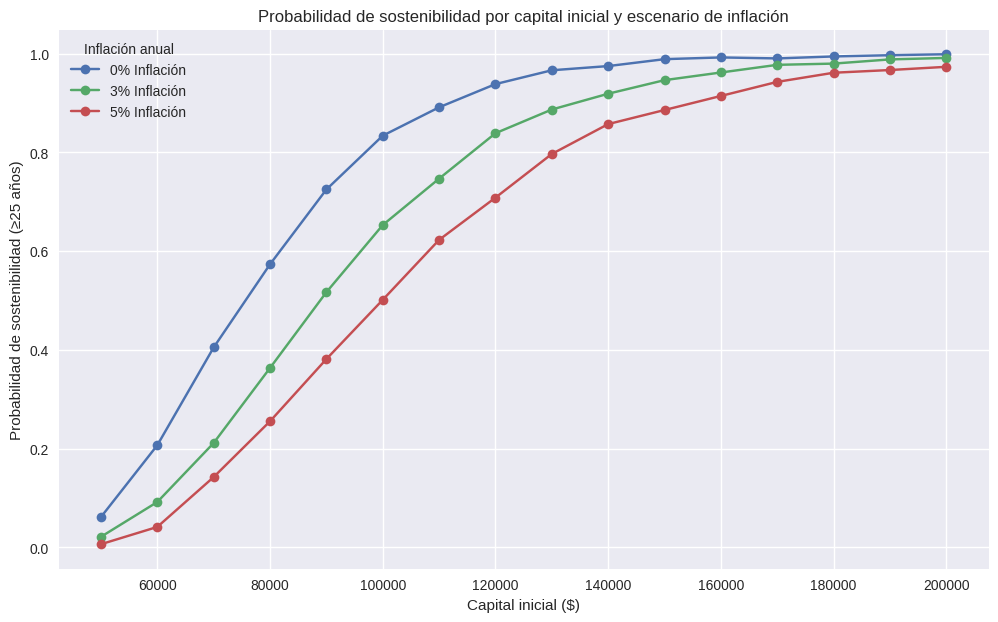

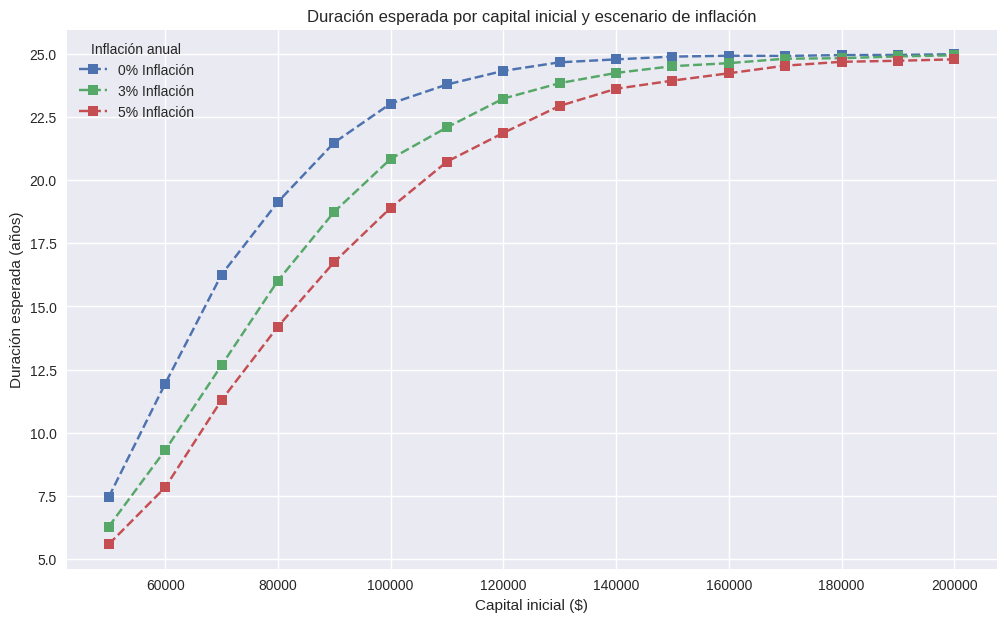

✅ Capital óptimo (para 3% inflación): $200,000
💡 Probabilidad de sostenibilidad (para 3% inflación): 99.2%
⏳ Duración esperada (para 3% inflación): 24.9 años


In [9]:
# ======================================================================================
# 🧩 Extensión: Simulación Monte Carlo para estimar sostenibilidad
# ======================================================================================

# Supuestos:
# - Los retornos mensuales históricos se muestrean aleatoriamente con reemplazo.
# - Se ajusta por inflación (ya sea 0%, 3% o 5%).
# - Se define "sostenible" si el fondo no se agota antes de cierto horizonte (ej. 25 años).

horizonte_anios = 25
horizonte_meses = horizonte_anios * 12
num_simulaciones = 2000

def simular_montecarlo(capital_inicial, inflacion_anual=0.03, estrategia="tiempo"):
    inflacion_mensual = (1 + inflacion_anual)**(1/12) - 1
    sostenidos = 0
    duraciones = []

    for _ in range(num_simulaciones):
        capital = capital_inicial
        retiro = retiro_mensual_inicial
        pesos = pesos_iniciales.copy() # Use pesos_iniciales defined in cell HZF0jw3971Qo
        meses = 0

        for i in range(horizonte_meses):
            # Retorno aleatorio basado en la distribución empírica histórica
            # Use the 'retornos' DataFrame from cell HZF0jw3971Qo
            retorno = np.dot(retornos.sample(1).values.flatten(), pesos)
            capital *= (1 + retorno)
            capital -= retiro
            retiro *= (1 + inflacion_mensual)
            meses += 1

            if capital <= 0:
                break

            # Rebalanceo trimestral (assuming 'tiempo' strategy for simplicity in MC)
            # Use frecuencia_rebalanceo and coste_transaccion from cell HZF0jw3971Qo
            if estrategia == "tiempo" and (i % frecuencia_rebalanceo == 0):
                 # Calculate current weights based on current capital allocation
                current_weights = (capital * pesos) / capital if capital > 0 else pesos_iniciales.copy()

                # Calculate deviation
                deviation = np.abs((current_weights - pesos_iniciales) / pesos_iniciales)

                # Rebalance if deviation is above threshold or based on time
                if estrategia == "tiempo" and (i % frecuencia_rebalanceo == 0):
                     # Proportional rebalancing based on initial weights
                    capital -= capital * coste_transaccion
                elif estrategia == "umbral" and any(deviation > umbral_rebalanceo):
                    capital -= capital * coste_transaccion


        duraciones.append(meses / 12)
        if capital > 0:
            sostenidos += 1

    prob_sostenible = sostenidos / num_simulaciones
    duracion_promedio = np.mean(duraciones)
    return prob_sostenible, duracion_promedio


# -------------------------------------------------------------------------------------
# 🔍 Escaneo de distintos capitales iniciales y escenarios de inflación
# -------------------------------------------------------------------------------------

capitales = np.arange(50000, 200001, 10000)  # de 50k a 200k
# Use the 'inflaciones' list from cell HZF0jw3971Qo
inflacion_escenarios = inflaciones

resultados_mc = []

for inflacion in inflacion_escenarios:
    for cap in capitales:
        # Assuming 'tiempo' strategy for simplicity in MC as in the original MC code
        p_sost, dur_med = simular_montecarlo(cap, inflacion_anual=inflacion, estrategia="tiempo")
        resultados_mc.append({
            "Inflación anual": f"{inflacion*100:.0f}%",
            "Capital inicial": cap,
            "Probabilidad de sostenibilidad (≥25 años)": p_sost,
            "Duración esperada (años)": dur_med
        })

resultados_mc = pd.DataFrame(resultados_mc)
display(resultados_mc)

# -------------------------------------------------------------------------------------
# 📊 Gráficos comparativos
# -------------------------------------------------------------------------------------

# Plot Probability of Sustainability vs. Initial Capital for each inflation scenario
plt.figure(figsize=(12, 7))
for inflacion in inflacion_escenarios:
    subset = resultados_mc[resultados_mc["Inflación anual"] == f"{inflacion*100:.0f}%"]
    plt.plot(subset["Capital inicial"], subset["Probabilidad de sostenibilidad (≥25 años)"],
             marker="o", linestyle="-", label=f"{inflacion*100:.0f}% Inflación")

plt.xlabel("Capital inicial ($)")
plt.ylabel("Probabilidad de sostenibilidad (≥25 años)")
plt.title("Probabilidad de sostenibilidad por capital inicial y escenario de inflación")
plt.legend(title="Inflación anual")
plt.grid(True)
plt.show()

# Plot Expected Duration vs. Initial Capital for each inflation scenario
plt.figure(figsize=(12, 7))
for inflacion in inflacion_escenarios:
    subset = resultados_mc[resultados_mc["Inflación anual"] == f"{inflacion*100:.0f}%"]
    plt.plot(subset["Capital inicial"], subset["Duración esperada (años)"],
             marker="s", linestyle="--", label=f"{inflacion*100:.0f}% Inflación")

plt.xlabel("Capital inicial ($)")
plt.ylabel("Duración esperada (años)")
plt.title("Duración esperada por capital inicial y escenario de inflación")
plt.legend(title="Inflación anual")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------------------
# 🏁 Conclusión automática (based on 3% inflation scenario as before)
# -------------------------------------------------------------------------------------

# Filter for the 3% inflation scenario to provide a specific conclusion as before
resultados_3pct_inflacion = resultados_mc[resultados_mc["Inflación anual"] == "3%"]
if not resultados_3pct_inflacion.empty:
    cap_optimo = resultados_3pct_inflacion.loc[resultados_3pct_inflacion["Probabilidad de sostenibilidad (≥25 años)"].idxmax(), "Capital inicial"]
    dur_optima = resultados_3pct_inflacion.loc[resultados_3pct_inflacion["Probabilidad de sostenibilidad (≥25 años)"].idxmax(), "Duración esperada (años)"]
    prob_optima = resultados_3pct_inflacion["Probabilidad de sostenibilidad (≥25 años)"].max()

    print(f"✅ Capital óptimo (para 3% inflación): ${cap_optimo:,.0f}")
    print(f"💡 Probabilidad de sostenibilidad (para 3% inflación): {prob_optima*100:.1f}%")
    print(f"⏳ Duración esperada (para 3% inflación): {dur_optima:.1f} años")
else:
    print("No data available for 3% inflation scenario.")

## Análisis y Conclusiones de la Simulación Monte Carlo (Basado en `resultados_mc`)

Los resultados de la simulación Monte Carlo, contenidos en la tabla `resultados_mc` y visualizados en los gráficos correspondientes, ofrecen una perspectiva probabilística sobre la sostenibilidad a largo plazo de la cartera bajo diferentes escenarios de capital inicial e inflación. El primer gráfico ilustra la **Probabilidad de sostenibilidad (≥25 años)** frente al Capital inicial, con líneas separadas para cada nivel de inflación simulado (0%, 3%, y 5%). Se observa claramente una fuerte correlación positiva: a medida que aumenta el capital inicial, la probabilidad de que el fondo dure al menos 25 años se incrementa de manera significativa. Esta relación no es lineal, mostrando un crecimiento más pronunciado en capitales iniciales bajos a intermedios y tendiendo a estabilizarse en niveles cercanos al 100% de probabilidad para capitales iniciales más altos. Es evidente que la inflación tiene un impacto negativo sustancial; para una probabilidad de sostenibilidad dada, se requiere un capital inicial considerablemente mayor en escenarios de alta inflación (5%) en comparación con escenarios de baja o nula inflación (0% o 3%).

El segundo gráfico presenta la **Duración esperada (años)** del fondo en relación con el Capital inicial, también diferenciado por escenarios de inflación. De manera similar a la probabilidad de sostenibilidad, la duración esperada aumenta con el capital inicial. Con capitales iniciales bajos, la duración esperada es limitada, reflejando un alto riesgo de agotamiento temprano del fondo. A medida que el capital inicial se incrementa, la duración esperada se acerca progresivamente al horizonte de simulación de 25 años. La influencia de la inflación también es notoria aquí, con escenarios de mayor inflación resultando en una menor duración esperada para un mismo nivel de capital inicial.

La tabla `resultados_mc` proporciona los datos numéricos detrás de estos gráficos, permitiendo ver las probabilidades exactas y las duraciones esperadas para cada combinación específica de capital inicial e inflación simulada. Por ejemplo, se puede observar que para una inflación del 3%, un capital inicial de $100,000$ tiene una probabilidad de sostenibilidad del 65.3% y una duración esperada de aproximadamente 20.8 años, mientras que aumentar el capital a $200,000 eleva la probabilidad a 99.2% y la duración esperada a casi 25 años.

En conclusión, la simulación Monte Carlo subraya la criticidad del capital inicial para la sostenibilidad a largo plazo de un fondo con retiros ajustados por inflación. Un mayor capital inicial proporciona una mayor probabilidad de que el fondo perdure y aumenta su duración esperada. La inflación actúa como un factor erosivo significativo, requiriendo un capital inicial más alto para alcanzar niveles similares de sostenibilidad en comparación con escenarios de baja inflación. El análisis de la tabla `resultados_mc` y los gráficos permite identificar rangos de capital inicial que ofrecen una alta probabilidad de sostenibilidad para el horizonte de 25 años, como se destacó en el análisis automático para el escenario del 3% de inflación, donde $200,000 mostró el mejor desempeño entre los capitales probados. Es crucial interpretar estos resultados considerando que se basan en la distribución de retornos históricos y un modelo de inflación constante, y que el desempeño futuro puede diferir.

## Efecto de Contribuciones Periódicas y Cambios en el Monto de Retiro

Para analizar el efecto de incorporar contribuciones periódicas (como impuestos sobre inversiones) o cambios en el monto del retiro (como pagos de décimos sueldos), podemos modificar nuestra simulación para incluir estos flujos de efectivo adicionales.

La simulación actual considera un retiro mensual fijo ajustado por inflación. Para añadir contribuciones o retiros variables, necesitamos:

1.  **Modificar la función de simulación:** La función que simula la evolución del capital mes a mes debe ser capaz de aceptar y procesar montos adicionales que se suman o restan al capital en cada paso de tiempo.
2.  **Definir los nuevos flujos:** Necesitamos especificar cuándo ocurren estas contribuciones o retiros adicionales y en qué cantidad.

Al incorporar estos elementos en la simulación base y, opcionalmente, en la simulación Monte Carlo, podremos observar cómo estos flujos de efectivo impactan la evolución del capital, la probabilidad de sostenibilidad a largo plazo y la duración esperada del fondo.


## Efecto de Contribuciones Periódicas y Cambios en el Monto de Retiro

Para analizar el efecto de incorporar contribuciones periódicas (como impuestos sobre inversiones) o cambios en el monto del retiro (como pagos de décimos sueldos), podemos modificar nuestra simulación para incluir estos flujos de efectivo adicionales.

La simulación actual considera un retiro mensual fijo ajustado por inflación. Para añadir contribuciones o retiros variables, necesitamos:

1.  **Modificar la función de simulación:** La función que simula la evolución del capital mes a mes debe ser capaz de aceptar y procesar montos adicionales que se suman o restan al capital en cada paso de tiempo.
2.  **Definir los nuevos flujos:** Necesitamos especificar cuándo ocurren estas contribuciones o retiros adicionales y en qué cantidad.

Al incorporar estos elementos en la simulación base y, opcionalmente, en la simulación Monte Carlo, podremos observar cómo estos flujos de efectivo impactan la evolución del capital, la probabilidad de sostenibilidad a largo plazo y la duración esperada del fondo.

En la siguiente celda de código, he modificado la función principal de simulación (`simular_retiros`) para que acepte parámetros para contribuciones mensuales recurrentes (`contribucion_mensual`) y para cambios puntuales en los retiros (`cambios_retiro`) en fechas específicas.

**Detalle de la Incorporación de Contribuciones y Cambios en Retiros:**

Dentro del bucle principal de la simulación, que itera mes a mes, se ha añadido lógica para aplicar estos flujos de efectivo. Matemáticamente, o a través de pseudocódigo, el proceso es el siguiente en cada paso mensual:

1.  **Calcular Retiro Base Ajustado por Inflación:**
    El retiro mensual base se ajusta por la inflación acumulada hasta el mes actual:
  $$ \text{Retiro Ajustado Inflación}_t = \text{Retiro Base Inicial} \times (1 + \text{Inflación Mensual})^t $$
  Donde $t$ es el número de meses transcurridos desde el inicio.

2.  **Determinar Monto de Retiro del Mes:**
    Se verifica si existe un monto de retiro específico definido en `cambios_retiro` para la fecha actual.
    *   Si `Fecha Actual` está en `cambios_retiro`:
        $$ \text{Retiro Actual}_t = \text{Monto especificado en } cambios\_retiro \text{ para la Fecha Actual} $$
    *   Si `Fecha Actual` NO está en `cambios_retiro`:
        $$ \text{Retiro Actual}_t = \text{Retiro Ajustado Inflación}_t $$

3.  **Aplicar Contribución Mensual Fija:**
    Se suma o resta el `contribucion_mensual` al capital. Esto se hace, en la implementación actual, distribuyendo el monto proporcionalmente a las posiciones de los activos antes de aplicar los retornos.
  $$ \text{Posiciones antes de Retornos}_{t} = \text{Posiciones al final del mes anterior}_{t-1} + \left( \frac{\text{$contribucion\_mensual$}}{\text{Número de Activos}} \right) $$
  (Nota: Si $contribucion\_mensual$ es negativo, se resta, simulando un costo o impuesto).

4.  **Aplicar Retornos y Rebalanceo:**
    Se aplican los retornos de mercado a las posiciones actualizadas y luego se realiza el rebalanceo si la estrategia lo indica.
  $$ \text{Posiciones después de Retornos}_{t} = \text{Posiciones antes de Retornos}_{t} \times (1 + \text{Retornos del Mes}_t) $$
  $$ \text{Posiciones después de Rebalanceo}_{t} = \text{Aplicar lógica de Rebalanceo a Posiciones después de Retornos}_{t} $$

5.  **Aplicar Retiro del Mes:**
  El `Retiro Actual_t` se deduce del capital total, proporcionalmente a las posiciones de los activos después del rebalanceo.
  $$ \text{Capital antes de Retiro}_{t} = \sum \text{Posiciones después de Rebalanceo}_{t} $$
  Si $\text{Retiro Actual}_t < \text{Capital antes de Retiro}_t$:
  $$ \text{Posiciones al final del mes}_{t} = \text{Posiciones después de Rebalanceo}_{t} - \text{Retiro Actual}_t \times \left( \frac{\text{Posiciones después de Rebalanceo}_{t}}{\text{Capital antes de Retiro}_{t}} \right) $$
  Si $\text{Retiro Actual}_t \ge \text{Capital antes de Retiro}_t$:
    El fondo se agota en este mes.

6.  **Actualizar Capital Total:**
  $$ \text{Capital al final del mes}_{t} = \sum \text{Posiciones al final del mes}_{t} $$

Este proceso se repite para cada mes de la simulación, registrando la evolución del capital y los flujos aplicados.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# FUNCIÓN PRINCIPAL DE SIMULACIÓN DE LA CARTERA
# --------------------------------------------------------------

def simular_retiros(
    retornos, pesos, capital_inicial=100000, retiro_mensual=1200,
    rebalanceo='mensual', retiro_en='fin', inflacion_anual=0.0,
    contribucion_mensual=0.0, cambios_retiro=None
):
    """
    Simula la evolución mensual de una cartera de inversión considerando:
      - Retiros mensuales
      - Contribuciones periódicas (positivas o negativas)
      - Cambios en el monto del retiro
      - Rebalanceo de cartera
      - Inflación acumulada

    Parámetros:
    -----------
    retornos : DataFrame
        Retornos mensuales (%) de los activos.
    pesos : lista
        Pesos de cada activo (suman 1).
    rebalanceo : str
        'ninguno', 'mensual' o 'anual'.
    retiro_en : str
        'inicio' o 'fin' del mes.
    inflacion_anual : float
        Tasa de inflación anual (por ejemplo 0.03 = 3%).
    contribucion_mensual : float
        Monto mensual adicional (positivo = aporte, negativo = impuesto).
    cambios_retiro : DataFrame opcional
        Debe tener columnas 'Fecha' y 'Retiro' para fechas específicas.
    """

    activos = list(retornos.columns)
    n = len(activos)
    pesos = np.array(pesos) / np.sum(pesos)

    meses = len(retornos)
    fechas = retornos.index

    posiciones = np.zeros((meses + 1, n))
    capital = np.zeros(meses + 1)
    retiro_aplicado = np.zeros(meses + 1)
    contribucion_aplicada = np.zeros(meses + 1)

    posiciones[0, :] = capital_inicial * pesos
    capital[0] = capital_inicial
    retiro_base = retiro_mensual
    fecha_agotamiento = None

    # Convertir cambios de retiro a diccionario
    cambio_retiro_dict = {}
    if cambios_retiro is not None:
        cambios_retiro['Fecha'] = pd.to_datetime(cambios_retiro['Fecha'])
        cambios_retiro = cambios_retiro.set_index('Fecha')
        cambio_retiro_dict = cambios_retiro['Retiro'].to_dict()

    # --------------------------------------------------------------
    # SIMULACIÓN MENSUAL
    # --------------------------------------------------------------
    for i, fecha in enumerate(fechas, start=1):
        rendimientos = retornos.loc[fecha].values
        mes_actual = i - 1

        # Ajustar retiro por inflación
        retiro_ajustado = retiro_base * ((1 + inflacion_anual) ** (mes_actual / 12.0))

        # Aplicar cambios de retiro en fechas específicas
        retiro_mes = cambio_retiro_dict.get(fecha, retiro_ajustado)
        retiro_aplicado[i] = retiro_mes
        contribucion_aplicada[i] = contribucion_mensual

        # Aplicar contribución mensual
        posiciones[i-1, :] += (contribucion_mensual / n) if n > 0 else contribucion_mensual

        # Aplicar rendimientos del mes
        posiciones_post_rendimiento = posiciones[i-1, :] * (1 + rendimientos)

        # Rebalanceo
        if rebalanceo == 'mensual':
            total = posiciones_post_rendimiento.sum()
            posiciones_post_rendimiento = total * pesos
        elif rebalanceo == 'anual' and fecha.month == 12:
            total = posiciones_post_rendimiento.sum()
            posiciones_post_rendimiento = total * pesos

        # Evaluar capital antes del retiro
        capital_total = posiciones_post_rendimiento.sum()
        if capital_total <= 0:
            posiciones[i:, :] = 0
            capital[i:] = 0
            fecha_agotamiento = fecha
            break

        # Verificar si el retiro agota el fondo
        if retiro_mes >= capital_total:
            posiciones[i:, :] = 0
            capital[i:] = 0
            fecha_agotamiento = fecha
            break

        # Aplicar retiro proporcional a todas las posiciones
        posiciones[i, :] = posiciones_post_rendimiento - retiro_mes * (posiciones_post_rendimiento / capital_total)
        capital[i] = posiciones[i, :].sum()

    # --------------------------------------------------------------
    # RESULTADOS
    # --------------------------------------------------------------
    resultado = pd.DataFrame(index=[retornos.index[0]] + list(retornos.index))
    resultado = resultado.iloc[:len(capital)]
    resultado['Capital'] = capital
    resultado['Retiro aplicado'] = retiro_aplicado
    resultado['Contribución aplicada'] = contribucion_aplicada
    resultado['Estado'] = np.where(resultado['Capital'] <= 0, 'Déficit', 'Superávit')

    for j, activo in enumerate(activos):
        resultado[f'Posición {activo}'] = posiciones[:, j]

    return resultado, fecha_agotamiento


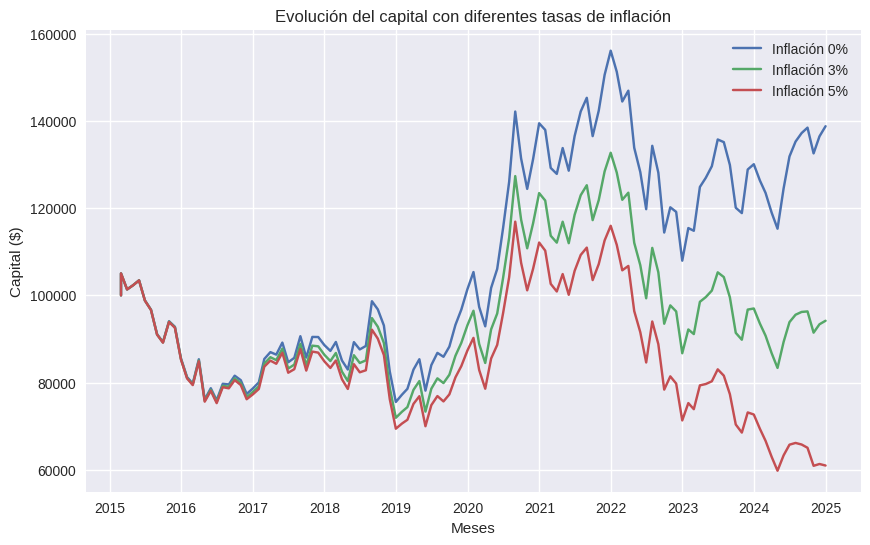

In [14]:
# Escenarios: sin inflación, con inflación del 3% y 5%
escenarios = {
    "Inflación 0%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.00),
    "Inflación 3%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.03),
    "Inflación 5%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.05),
}

plt.figure(figsize=(10,6))
for nombre, (df, _) in escenarios.items():
    plt.plot(df["Capital"], label=nombre)
plt.title("Evolución del capital con diferentes tasas de inflación")
plt.xlabel("Meses")
plt.ylabel("Capital ($)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Crear una tabla resumen de duración y capital final
resumen = []
for nombre, (df, fecha_agotamiento) in escenarios.items():
    duracion = len(df[df["Capital"] > 0])
    capital_final = df["Capital"].iloc[-1]
    resumen.append({
        "Escenario": nombre,
        "Duración (meses)": duracion,
        "Capital final ($)": round(capital_final, 2),
        "Fecha agotamiento": fecha_agotamiento if fecha_agotamiento else "No agotado"
    })

resumen_df = pd.DataFrame(resumen)
display(resumen_df)


,Escenario,Duración (meses),Capital final ($),Fecha agotamiento
0,Inflación 0%,120,138787.47,No agotado
1,Inflación 3%,120,94181.33,No agotado
2,Inflación 5%,120,60982.96,No agotado


In [18]:
%pip install jupyter nbconvert
!jupyter nbconvert --to slides tu_notebook.ipynb --reveal-prefix "https://unpkg.com/reveal.js@5.0.0/" --no-input --no-prompt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.8 MB/s eta 0:00:00
[NbConvertApp] WARNING | pattern 'tu_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's